# Task 1: Linear Regression Project – Predicting Inflation in 13 African Countries
 **Use Case Definition**

**Mission:**
To build a predictive analytics system that forecasts annual inflation rates for 13 African countries using economic, financial, and crisis history data.

**Specific Use Case:**
Predict annual inflation (inflation_annual_cpi) for selected African countries on a year-by-year basis, using a range of historical financial and macroeconomic features from a multi-year, multi-country panel dataset covering crisis events, exchange rates, and fiscal indicators.



# 1. File Upload and Data Loading





In [89]:
# Upload your 'african_crises.xls' (CSV format)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('african_crises.xls')
print("Columns:", df.columns.tolist())
print(df.head())
print(df.describe())
print(df.info())

Saving african_crises.xls to african_crises (2).xls
Columns: ['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']
   case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                   

     

# 2. Drop Non-Numeric (Label) Column

In [90]:
# Drop last column if it's not numeric (string label)
if not np.issubdtype(df.iloc[:, -1].dtype, np.number):
    print("Dropping last column (string label):", df.columns[-1])
    df = df.iloc[:, :-1]

Dropping last column (string label): banking_crisis


     

# 3. List Countries and Years Present in Data

In [91]:
print("Countries in data:", df['country'].unique())
print("Number of countries:", df['country'].nunique())
print("Years:", df['year'].unique())

Countries in data: ['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']
Number of countries: 13
Years: [1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1962 1963 1964 1965 1966 1967 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920]


# 4.Boxplot: Shows the distribution of annual CPI inflation by country

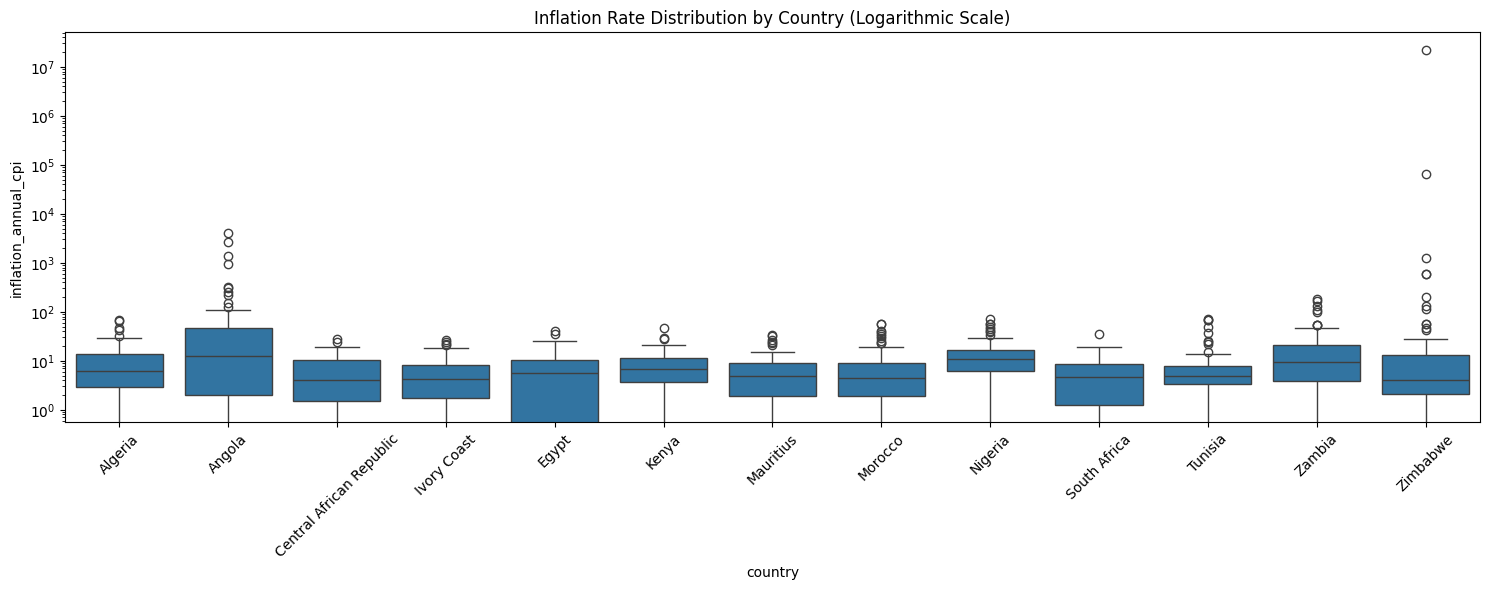

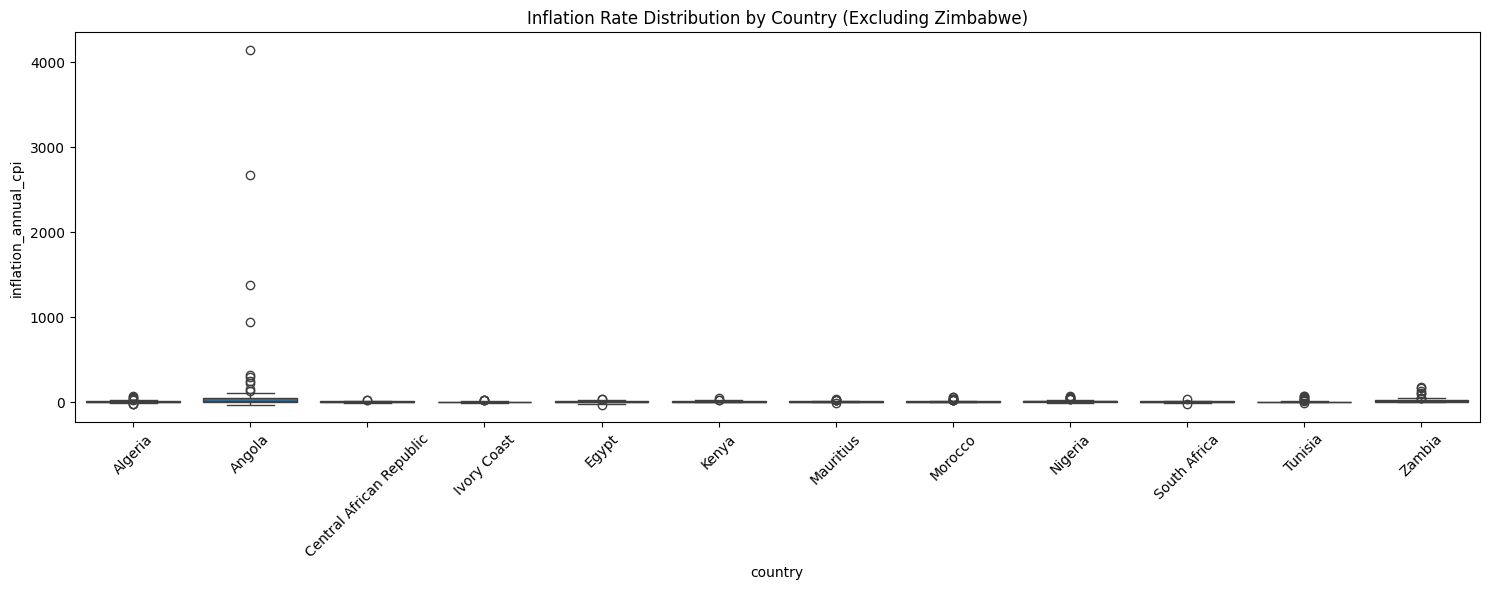

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is df and contains 'country' and 'inflation_annual_cpi'

# 1. Boxplot with logarithmic scale on y-axis
plt.figure(figsize=(15, 6))
sns.boxplot(x='country', y='inflation_annual_cpi', data=df)
plt.yscale('log')  # Setting y-axis to log scale
plt.title('Inflation Rate Distribution by Country (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Zoomed-in boxplot excluding Zimbabwe to focus on typical inflation rates
plt.figure(figsize=(15, 6))
sns.boxplot(x='country', y='inflation_annual_cpi', data=df[df['country'] != 'Zimbabwe'])
plt.title('Inflation Rate Distribution by Country (Excluding Zimbabwe)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The first plot applies a logarithmic scale on the y-axis, handling extreme values like Zimbabwe’s hyperinflation and showing a clearer range of inflation rates across all countries. This log scale compresses large values while preserving smaller ones, revealing underlying patterns. The second plot excludes Zimbabwe, focusing only on typical inflation levels in other countries, which allows clearer comparison without distortion from extreme outliers. Together, these plots provide a balanced view of inflation, highlighting both normal variations and exceptional economic crises.


# 5.Line Plot: Plots inflation trends over time

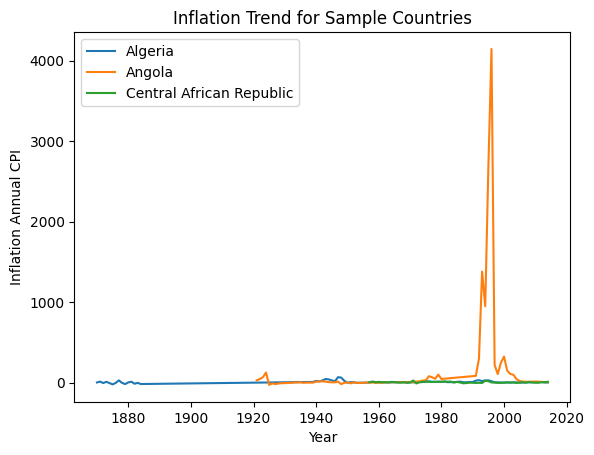

In [93]:
for c in df['country'].unique()[:3]:
    plt.plot(df[df['country']==c]['year'], df[df['country']==c]['inflation_annual_cpi'], label=c)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Inflation Annual CPI')
plt.title('Inflation Trend for Sample Countries')
plt.show()

The chart shows the annual inflation trends for Algeria, Angola, and the Central African Republic from the late 1800s to around 2020. Algeria and the Central African Republic display relatively stable inflation rates throughout most of the period, with minor fluctuations. Angola, by contrast, experiences extreme volatility, including a dramatic spike in inflation around the late 1990s and early 2000s peaking well above 4,000% annually. This highlights periods of hyperinflation linked to serious economic and possibly political crises, especially in Angola, while the other two countries generally maintained much lower, steadier inflation rates over time.

# 6.Correlation Matrix (Heatmap): Displays a heatmap of correlations among all numeric variables

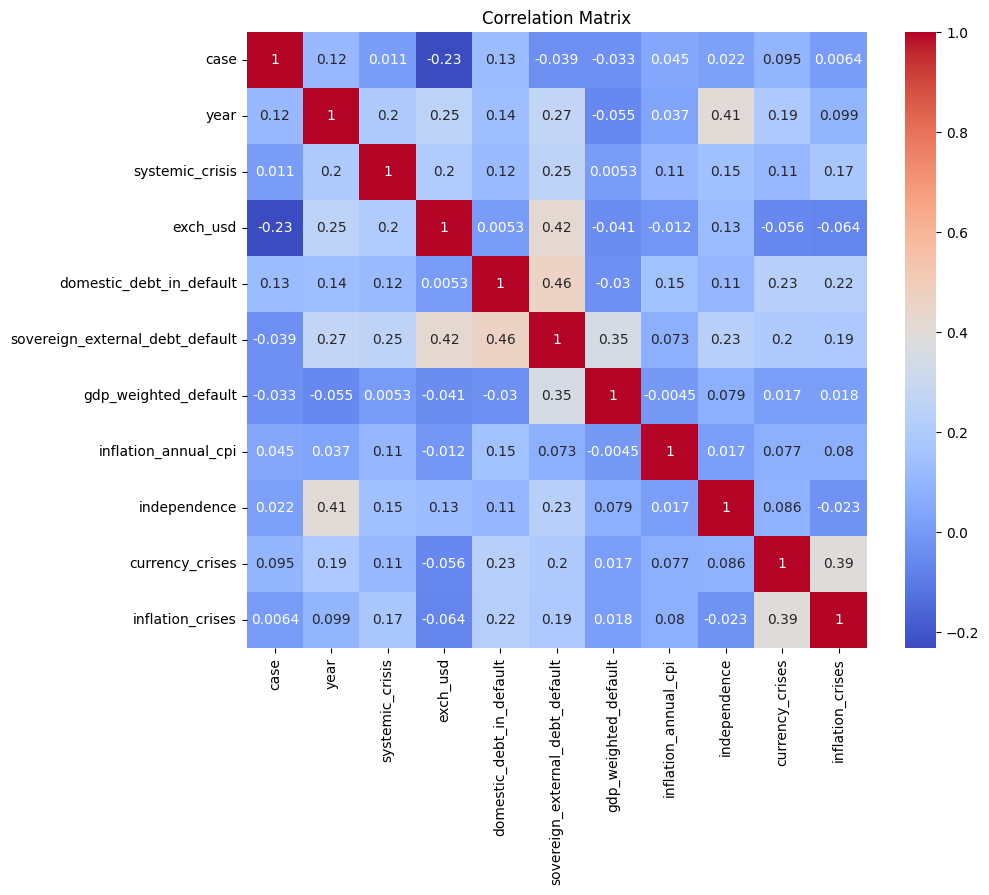

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The chart is a correlation matrix visualizing the relationships among various economic and crisis-related variables. Each cell displays a correlation coefficient between -1 and 1, where values close to 1 (red) indicate a strong positive relationship and values near -1 (blue) indicate a strong negative relationship. The darkest red squares on the diagonal show perfect self-correlation. Notably, variables like exchange rates, sovereign debt default, and domestic debt default have moderately high positive correlations, signaling they tend to move together. Most off-diagonal correlations are low, suggesting limited strong linear relationships among the majority of the economic indicators in the dataset.

# 7.Drop Columns and Encode Country

In [95]:
# Drop columns that are not useful or are redundant (keep 'country' for analysis)
drop_cols = ['case', 'cc3']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Encode 'country' as numeric for modeling
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
df['country_enc'] = le_country.fit_transform(df['country'])
print(df.isnull().sum())
df = df.dropna()

country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
country_enc                        0
dtype: int64


# 8.Inflation Prediction Features Data Overview

In [96]:
features = [
    'country_enc', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
    'sovereign_external_debt_default', 'gdp_weighted_default', 'independence',
    'currency_crises', 'inflation_crises'
]
target = 'inflation_annual_cpi'

X = df[features]
y = df[target]

# 10.Convert Features Numeric and Scale

In [97]:
# Ensure all features are numeric
for col in X.columns:
    if X[col].dtype == object:
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11.Inflation Distribution Histogram Log Scale

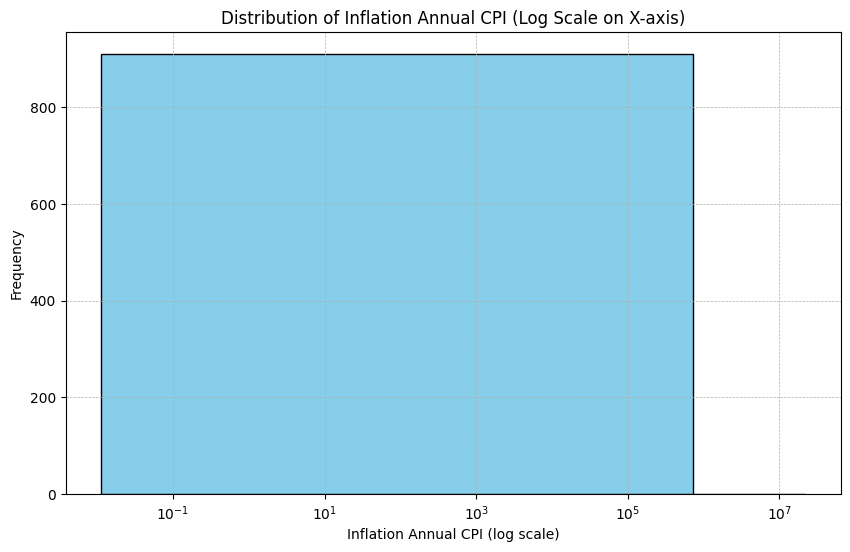

In [98]:
# Filter out non-positive inflation values, since log scale requires positive values.
inflation_positive = df['inflation_annual_cpi'][df['inflation_annual_cpi'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(inflation_positive, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Inflation Annual CPI (Log Scale on X-axis)')
plt.xlabel('Inflation Annual CPI (log scale)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.show()


The chart is a histogram depicting the distribution of positive annual inflation rates (CPI) on a logarithmic scale. Most inflation values cluster at lower ranges, visible on the left side of the log-scaled x-axis, indicating that modest inflation is most common. The log scale reveals the full spread of inflation, including rare but extreme hyperinflation events causing long right tails in the histogram.

# 12.Summary Statistics for Inflation

In [99]:
print(df['inflation_annual_cpi'].describe())

count    1.059000e+03
mean     2.084889e+04
std      6.757274e+05
min     -2.850214e+01
25%      2.086162e+00
50%      5.762330e+00
75%      1.164405e+01
max      2.198970e+07
Name: inflation_annual_cpi, dtype: float64


# 13.Inflation Min, NaNs, Non-positive

In [73]:
print(df['inflation_annual_cpi'].min())
print(df['inflation_annual_cpi'].isna().sum())
print(df['inflation_annual_cpi'][df['inflation_annual_cpi'] <= 0])

-28.50213688
0
2      -3.718593
4      -3.848561
5     -20.924178
6      -1.769547
8      -1.492537
         ...    
835    -0.595294
837     0.000000
841    -8.264217
843    -1.769991
917    -0.448430
Name: inflation_annual_cpi, Length: 134, dtype: float64


# 14.Filter Rows Positive Inflation Values

In [74]:
# Remove rows where inflation_annual_cpi is missing or <= 0
df = df[df['inflation_annual_cpi'].notna()]
df = df[df['inflation_annual_cpi'] > 0]

# 15.Apply Log Transform to Target

In [75]:
cols_to_drop = df.columns[df.columns.str.contains('zimbabwe', case=False)]
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")



Dropped columns: []


In [76]:
y = np.log1p(df['inflation_annual_cpi'])

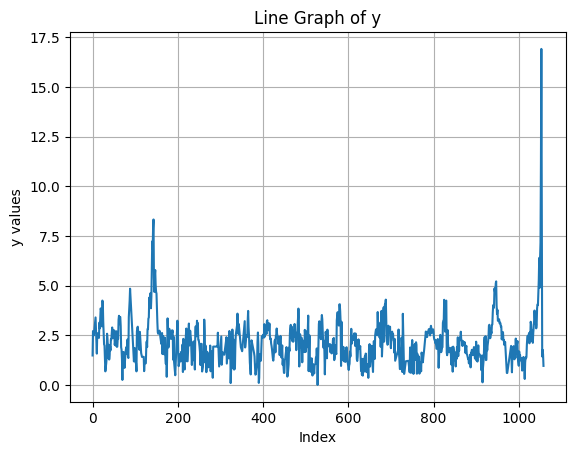

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# If you only have y (values), x will be the default indices [0, 1, 2, ...]
plt.plot(y)
plt.xlabel('Index')
plt.ylabel('y values')
plt.title('Line Graph of y')
plt.grid(True)
plt.show()


# 16.Filter, Prepare, Scale, Split Data

In [100]:
#Filter DataFrame for valid target values FIRST
df = df[df['inflation_annual_cpi'].notna()]
df = df[df['inflation_annual_cpi'] > 0]

#Prepare features and target from the filtered DataFrame
features = [
    'country_enc', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
    'sovereign_external_debt_default', 'gdp_weighted_default', 'independence',
    'currency_crises', 'inflation_crises'
]
X = df[features]
y = np.log1p(df['inflation_annual_cpi'])
#Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 17.SGD Linear Regression Training Curve

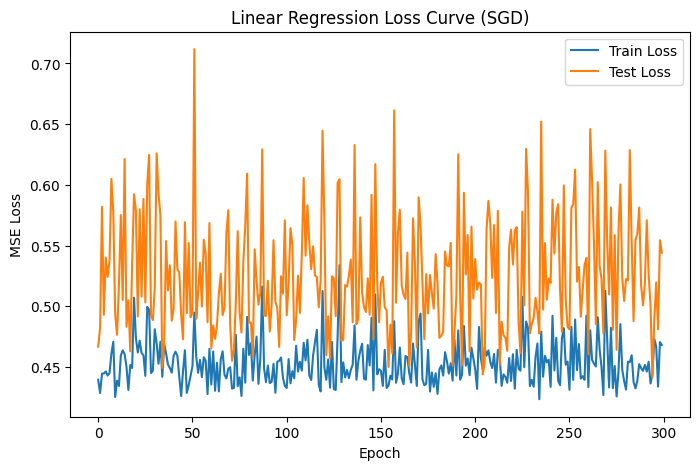

In [79]:
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

# Increase the number of iterations for better convergence
lr = SGDRegressor(
    loss='squared_error',
    max_iter=1,
    learning_rate='constant',
    eta0=0.01,
    tol=None,
    warm_start=True,
    random_state=42
)

train_losses, test_losses = [], []
epochs = 300

for i in range(epochs):
    lr.max_iter += 1
    lr.fit(X_train, y_train)
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)
    train_losses.append(np.mean((y_train - train_pred) ** 2))
    test_losses.append(np.mean((y_test - test_pred) ** 2))

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Linear Regression Loss Curve (SGD)')
plt.legend()
plt.show()

The chart shows the loss curves for a linear regression model trained with Stochastic Gradient Descent (SGD) over 300 epochs. The blue line represents the training loss (MSE), which stays consistently low and stable around 0.5, indicating good fit on the training data. The orange line shows the test loss

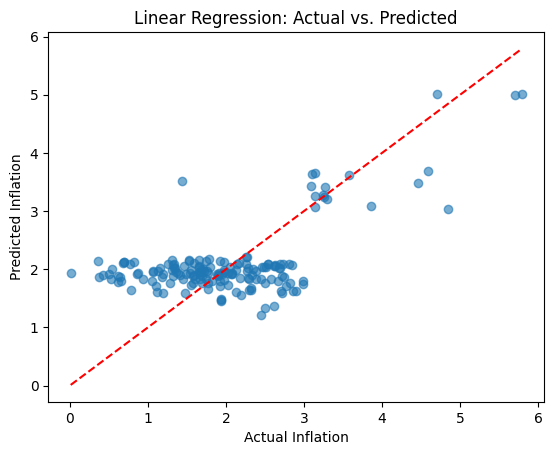

In [80]:
plt.scatter(y_test, lr.predict(X_test), alpha=0.6)
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.title('Linear Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

The scatter plot compares actual inflation values with predicted inflation values from a linear regression model. Ideally, points should lie close to the red dashed line, representing perfect predictions where actual equals predicted values.

# 18.Train Decision Tree and RandomForest

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 19.Generate Predictions for All Models

In [82]:
# Generate predictions for each model
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# 20.Select, Save Best Model Pipeline

In [83]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Choose the best model (lowest MSE on test set)
mse_scores = {
    'linear': mean_squared_error(y_test, lr_pred),
    'tree': mean_squared_error(y_test, dt_pred),
    'forest': mean_squared_error(y_test, rf_pred)
}
best_model_name = min(mse_scores, key=mse_scores.get)
if best_model_name == 'linear':
    best_model = lr
elif best_model_name == 'tree':
    best_model = dt
else:
    best_model = rf

joblib.dump(best_model, 'best_inflation_model.pkl')
joblib.dump(scaler, 'inflation_scaler.pkl')
joblib.dump(features, 'inflation_features.pkl')
joblib.dump(le_country, 'inflation_le_country.pkl')
print(f"Best model ({best_model_name}) saved.")

Best model (forest) saved.


# 21.Evaluate and Print Model Metrics

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Generate predictions for each model
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²:  {r2:.4f}")

print_metrics("Linear Regression", y_test, lr_pred)
print_metrics("Decision Tree", y_test, dt_pred)
print_metrics("Random Forest", y_test, rf_pred)


Linear Regression Results:
  RMSE: 0.7377
  MSE: 0.5441
  MAE: 0.5875
  R²:  0.3868

Decision Tree Results:
  RMSE: 0.6884
  MSE: 0.4739
  MAE: 0.5093
  R²:  0.4660

Random Forest Results:
  RMSE: 0.5558
  MSE: 0.3089
  MAE: 0.4280
  R²:  0.6519


# 22.Predict Inflation

In [85]:
new_data = {
    'country_enc': le_country.transform(['Nigeria'])[0],
    'year': 1954,
    'systemic_crisis': 1,
    'exch_usd':0,
    'domestic_debt_in_default': 0,
    'sovereign_external_debt_default': 0,
    'gdp_weighted_default': 0.5,
    'independence': 0,
    'currency_crises': 0,
    'inflation_crises': 0
}
new_X = pd.DataFrame([new_data])[features]
new_X_scaled = scaler.transform(new_X)
pred_log = best_model.predict(new_X_scaled)
pred_original = np.expm1(pred_log[0])
print("Predicted inflation (log scale):", pred_log[0])
print("Predicted inflation (original scale):", pred_original)

Predicted inflation (log scale): 1.525306821238409
Predicted inflation (original scale): 3.596553673261149


# 23.Predict Actual vs. Predicted Inflation

In [86]:
results = []
for idx, row in df.iterrows():
    input_data = {f: row[f] for f in features}
    new_X = pd.DataFrame([input_data])
    new_X_scaled = scaler.transform(new_X)
    pred_log = best_model.predict(new_X_scaled)[0]
    pred_original = np.expm1(pred_log)
    results.append({
        'country': row['country'],
        'year': row['year'],
        'actual': row['inflation_annual_cpi'],
        'predicted': pred_original
    })

results_df = pd.DataFrame(results)
print(results_df.head())

   country  year     actual  predicted
0  Algeria  1870   3.441456   4.003788
1  Algeria  1871  14.149140   9.276528
2  Algeria  1873  11.203897   5.603428
3  Algeria  1877  29.116045  31.009311
4  Algeria  1880   3.881188   4.231270


# 24.Actual vs Predicted Inflation Scatter

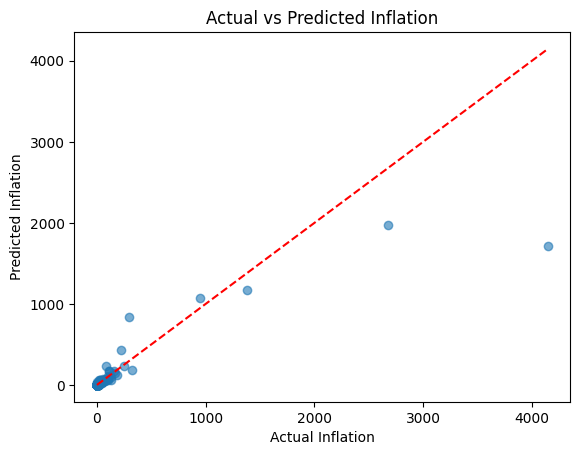

In [87]:
import matplotlib.pyplot as plt

plt.scatter(results_df['actual'], results_df['predicted'], alpha=0.6)
plt.plot([results_df['actual'].min(), results_df['actual'].max()],
         [results_df['actual'].min(), results_df['actual'].max()], 'r--')
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.title('Actual vs Predicted Inflation')
plt.show()

the scatter plot shows predicted vs actual inflation values. A red dashed line represents the ideal case where predictions equal actual values